In [1]:
# Cell 1: Setup
import data_loader
import importlib
importlib.reload(data_loader)


# Setup
from data_loader import *
import matplotlib.pyplot as plt
import numpy as np


print("BOX_SIZE2:", BOX_SIZE)

Loading bubble data...
✓ Loaded 634277 observations
✓ Timesteps added: 0 to 3426
✓ Identified 300 disappearing bubbles
Applying periodic boundary corrections...
✓ Periodic boundary correction applied
✓ Derived quantities computed

DATA LOADING COMPLETE
Total observations:       634,277
Unique bubbles:           400
Timesteps:                0 to 3426
Disappearing bubbles:     300
Box size:                 22.36068
Initial avg area (A_0):   1.000000

Available variables:
  - df: Original dataframe
  - df_corrected: Corrected dataframe with actual_area column
  - disappearing_ids: Set of disappearing bubble IDs
  - bubbles_per_timestep: Number of bubbles at each timestep
  - avg_area_per_timestep: Average bubble area at each timestep
  - approx_avg_area: Approximate area from liquid fraction
  - A_0: Initial average bubble area
  - max_timestep: Maximum timestep
  - final_step: Final timestep
  - box_area: Total box area
  - BOX_SIZE, PERIODIC_THRESHOLD, LIQUID_FRACTION: Constants

Loadi

In [10]:

# Cell 2: Random Bubble Selection
bubble_id_to_analyze = np.random.choice(df_corrected["id"].unique())
bubble_data = df_corrected[df_corrected["id"] == bubble_id_to_analyze].sort_values("timestep").copy()

print(f"Analyzing bubble #{bubble_id_to_analyze}")
print(f"Lifetime: {len(bubble_data)} timesteps")


Analyzing bubble #74
Lifetime: 1446 timesteps


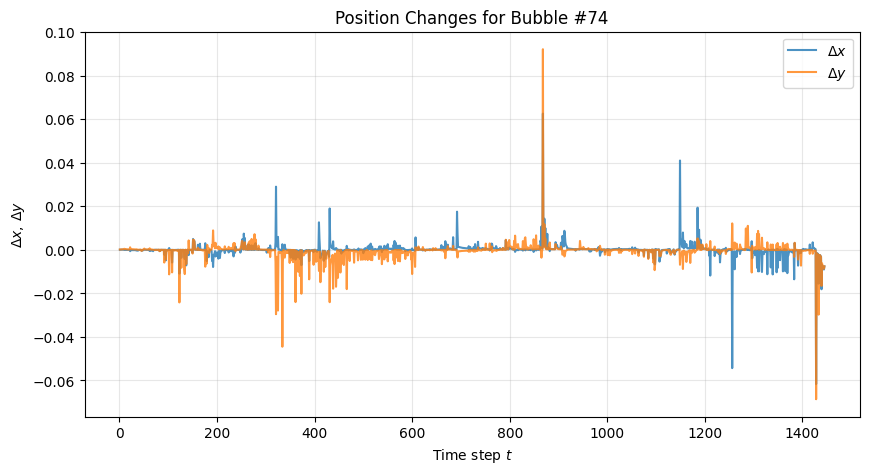

Mean Δx: 0.000025, Std: 0.003752
Mean Δy: -0.000529, Std: 0.004392


In [11]:

# Cell 3: Position Changes
if len(bubble_data) > 1:
    x = bubble_data["x"].to_numpy()
    y = bubble_data["y"].to_numpy()
    
    changes_x = np.diff(x)
    changes_y = np.diff(y)
    
    step_numbers = np.arange(1, len(changes_x) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(step_numbers, changes_x, label=r'$\Delta x$', alpha=0.8)
    plt.plot(step_numbers, changes_y, label=r'$\Delta y$', alpha=0.8)
    plt.xlabel(r'Time step $t$')
    plt.ylabel(r'$\Delta x, \, \Delta y$')
    plt.title(f'Position Changes for Bubble #{bubble_id_to_analyze}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/02_Figures/position_changes_2.png", dpi=300)
    plt.show()
    
    print(f"Mean Δx: {np.mean(changes_x):.6f}, Std: {np.std(changes_x):.6f}")
    print(f"Mean Δy: {np.mean(changes_y):.6f}, Std: {np.std(changes_y):.6f}")


/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_4532/987889343.py:7: RuntimeWarning: invalid value encountered in log
  log_ret_y = np.log(shifted_y[1:] / shifted_y[:-1])


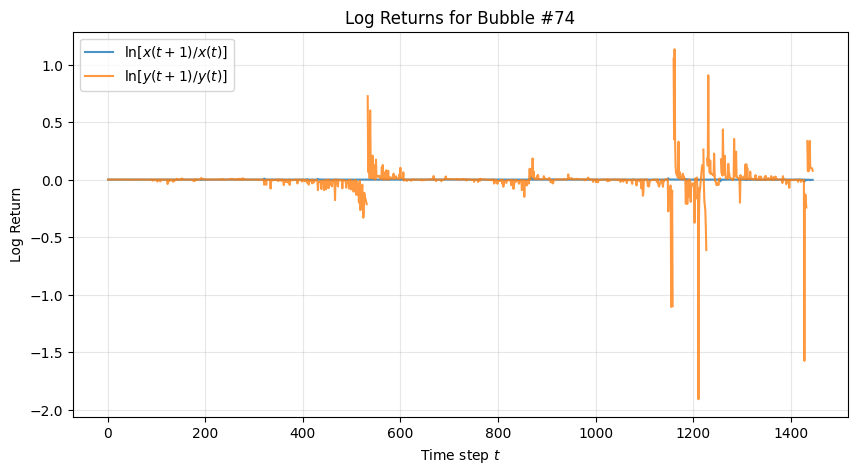

In [14]:

# Cell 4: Log Returns
if len(bubble_data) > 1:
    shifted_x = x + 1e-6
    shifted_y = y + 1e-6
    
    log_ret_x = np.log(shifted_x[1:] / shifted_x[:-1])
    log_ret_y = np.log(shifted_y[1:] / shifted_y[:-1])
    
    plt.figure(figsize=(10, 5))
    plt.plot(step_numbers, log_ret_x, label=r'$\ln[x(t+1)/x(t)]$', alpha=0.8)
    plt.plot(step_numbers, log_ret_y, label=r'$\ln[y(t+1)/y(t)]$', alpha=0.8)
    plt.xlabel(r'Time step $t$')
    plt.ylabel(r'Log Return')
    plt.title(f'Log Returns for Bubble #{bubble_id_to_analyze}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/02_Figures/log_returns_2.png", dpi=300)
    plt.show()

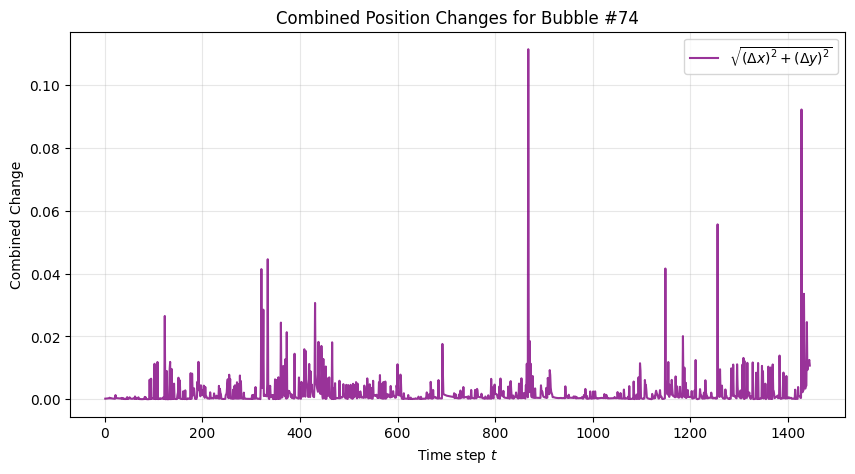

In [13]:
# Cell 5: Combine x and y Changes

combined_changes = np.sqrt(changes_x**2 + changes_y**2)

plt.figure(figsize=(10, 5))
plt.plot(step_numbers, combined_changes, label=r'$\sqrt{(\Delta x)^2 + (\Delta y)^2}$', color='purple', alpha=0.8)
plt.xlabel(r'Time step $t$')
plt.ylabel(r'Combined Change')
plt.title(f'Combined Position Changes for Bubble #{bubble_id_to_analyze}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/02_Figures/combined_position_changes_2.png", dpi=300)
plt.show()


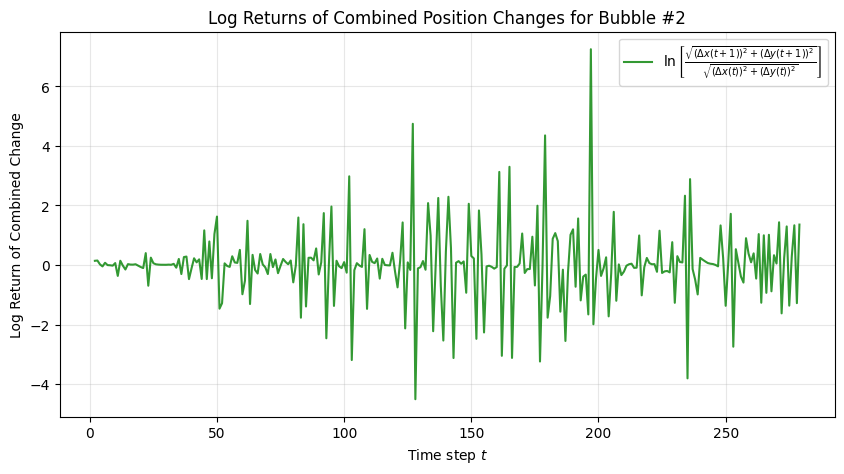

In [6]:
# Cell 4: Log Returns of Combined Changes
if len(bubble_data) > 1:
    # Calculate combined position changes
    combined_changes = np.sqrt(changes_x**2 + changes_y**2)
    
    # Calculate log returns of combined changes
    log_ret_combined = np.log(combined_changes[1:] / combined_changes[:-1])

    plt.figure(figsize=(10, 5))
    plt.plot(step_numbers[1:], log_ret_combined, label=r'$\ln\left[\frac{\sqrt{(\Delta x(t+1))^2 + (\Delta y(t+1))^2}}{\sqrt{(\Delta x(t))^2 + (\Delta y(t))^2}}\right]$', color='green', alpha=0.8)
    plt.xlabel(r'Time step $t$')
    plt.ylabel(r'Log Return of Combined Change')
    plt.title(f'Log Returns of Combined Position Changes for Bubble #{bubble_id_to_analyze}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/02_Figures/log_returns_combined_2.png", dpi=300)
    plt.show()